In [1]:
# -*- coding: utf-8 -*-
"""
Created on Sun august 21 14:35:15 2016
@author: Sidon
"""
%matplotlib inline
import pandas as pd
import numpy as np
from collections import OrderedDict
from tabulate import tabulate, tabulate_formats
import seaborn as sn
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi 
import statsmodels.api as sm

# bug fix for display formats to avoid run time errors
pd.set_option('display.float_format', lambda x:'%f'%x)

# Load from CSV
data0 = pd.read_csv('~/dev/coursera/gapminder.csv', skip_blank_lines=True,
                     usecols=['country','incomeperperson',
                              'alcconsumption','lifeexpectancy', 'urbanrate'])
 
# Rename columns for clarity                                    
data0.columns = ['country','income','alcohol','life','urban_rate']

# Variables Descriptions
INCOME = "2010 Gross Domestic Product per capita in constant 2000 US$"
ALCOHOL = "2008 alcohol consumption per adult (liters, age 15+)"
LIFE = "2011 life expectancy at birth (years)"


# converting to numeric values and parsing (numeric invalids=NaN)
for dt in ('alcohol','income','life', 'urban_rate') :
   data0[dt] = pd.to_numeric(data0[dt], 'errors=coerce') 

# Remove rows with nan values
data0 = data0.dropna(axis=0, how='any')

# Copy dataframe for preserv original
data1 = data0.copy()

In [2]:
reg1 = smf.ols('life ~ alcohol', data=data1).fit()
print (reg1.summary())

                            OLS Regression Results                            
Dep. Variable:                   life   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     16.58
Date:                Sun, 02 Oct 2016   Prob (F-statistic):           7.14e-05
Time:                        00:06:32   Log-Likelihood:                -623.16
No. Observations:                 171   AIC:                             1250.
Df Residuals:                     169   BIC:                             1257.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     65.4013      1.210     54.048      0.0

In [3]:
data1['income_center'] = data1.income-data1.income.mean()
print (data1.income.mean(), '==>', data1.income_center.mean())

7006.3597979701035 ==> -2.430637887194317e-12


In [4]:
reg2 = smf.ols('life ~ alcohol + income_center', data=data1).fit()
print (reg2.summary())

                            OLS Regression Results                            
Dep. Variable:                   life   R-squared:                       0.372
Model:                            OLS   Adj. R-squared:                  0.365
Method:                 Least Squares   F-statistic:                     49.79
Date:                Sun, 02 Oct 2016   Prob (F-statistic):           1.05e-17
Time:                        00:06:33   Log-Likelihood:                -591.37
No. Observations:                 171   AIC:                             1189.
Df Residuals:                     168   BIC:                             1198.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept        67.5329      1.037     65.116

In [5]:
data1['urban_center'] = data1.urban_rate-data1.urban_rate.mean()
print (data1.urban_rate.mean(), '==>', data1.urban_center.mean())

54.87321637426899 ==> 1.354601940688846e-14


In [6]:
reg3 = smf.ols('life ~ alcohol + income_center + urban_center', data=data1).fit()
print (reg3.summary())

                            OLS Regression Results                            
Dep. Variable:                   life   R-squared:                       0.465
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                     48.36
Date:                Sun, 02 Oct 2016   Prob (F-statistic):           1.50e-22
Time:                        00:06:33   Log-Likelihood:                -577.71
No. Observations:                 171   AIC:                             1163.
Df Residuals:                     167   BIC:                             1176.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept        68.1287      0.967     70.476

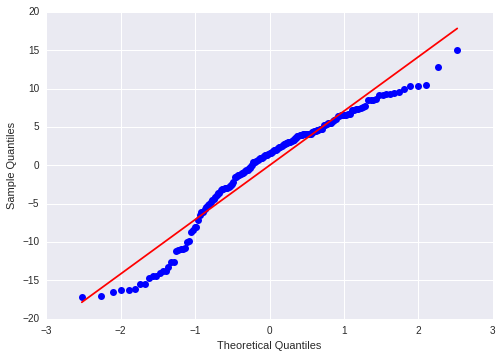

In [7]:
fig1 = sm.qqplot(reg3.resid, line='r')

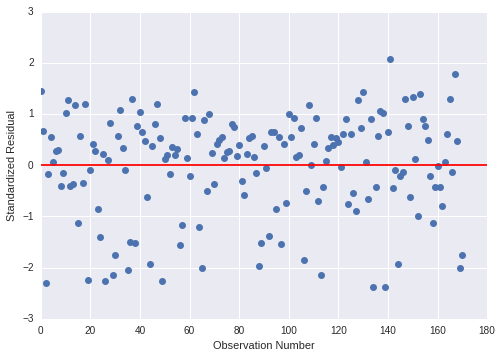

In [8]:
stdres=pd.DataFrame(reg3.resid_pearson)
fig2 = plt.plot(stdres, 'o', ls='None')
l = plt.axhline(y=0, color='r')
plt.ylabel('Standardized Residual')
plt.xlabel('Observation Number')

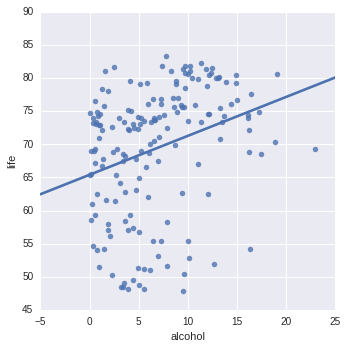

In [9]:
sn.lmplot(x="alcohol", y="life", data=data1,
           order=1, ci=None, scatter_kws={"s": 30});

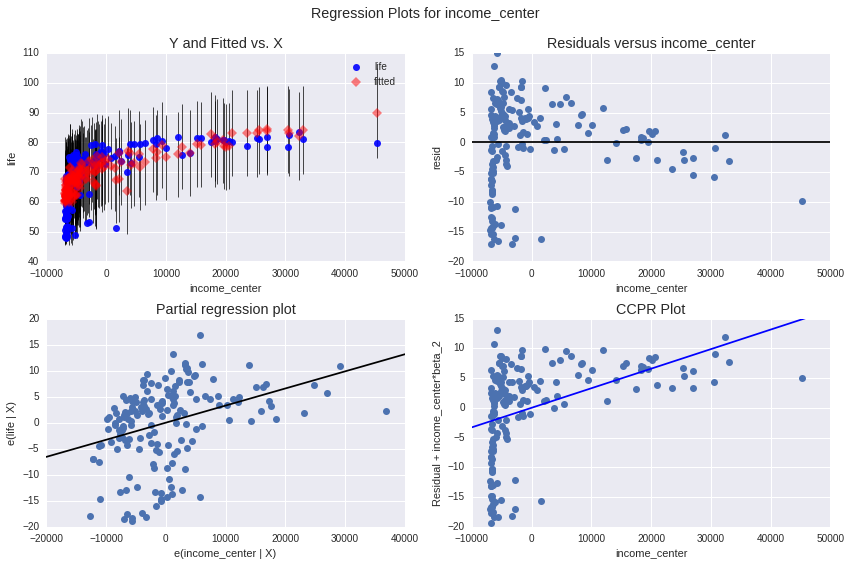

In [10]:
fig3 = plt.figure(figsize=(12,8))
fig3 = sm.graphics.plot_regress_exog(reg3, "income_center", fig=fig3)

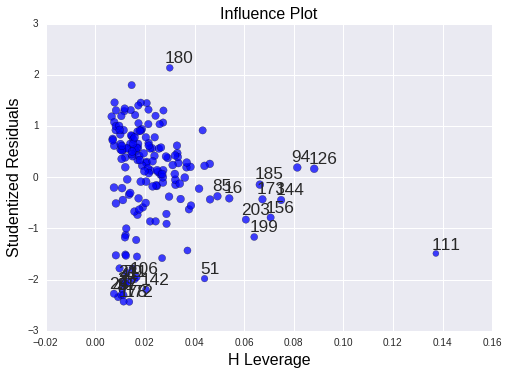

In [11]:
fig4 = sm.graphics.influence_plot(reg3, size=6)
